In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression , LinearRegression

from datetime import datetime
random.seed(datetime.now())
warnings.filterwarnings('ignore')

# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

/Users/pipiterry/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/pipiterry/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import os.path
userhome = os.path.expanduser('~')
csvfile = os.path.join(userhome, 'Desktop', 'bank', 'bank2.csv')
df = pd.read_csv(csvfile)
print(df)

      age            job   marital            education  default  housing  \
0      52         admin.    single    university.degree  unknown  unknown   
1      49    blue-collar  divorced          high.school       no       no   
2      25    blue-collar    single             basic.9y       no      yes   
3      27         admin.    single    university.degree       no       no   
4      44         admin.   married    university.degree       no      yes   
5      31    blue-collar   married             basic.4y       no       no   
6      51    blue-collar  divorced             basic.9y       no      yes   
7      41    blue-collar   married             basic.6y       no       no   
8      59        retired   married    university.degree       no      yes   
9      34     technician   married             basic.9y       no       no   
10     57        retired   married             basic.9y  unknown      yes   
11     39         admin.    single          high.school       no       no   

In [3]:
sum(df.isnull().values.ravel())

0

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,39.581400,265.173400,2.53760,958.682000,0.177800,0.05834,93.569322,-40.538980,3.596636,5166.480940,0.118200
std,10.254112,263.436793,2.81776,196.012383,0.505013,1.58084,0.577387,4.606221,1.742869,71.908468,0.322877
min,17.000000,1.000000,1.00000,0.000000,0.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,105.000000,1.00000,999.000000,0.000000,-1.80000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.00000,999.000000,0.000000,1.10000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,46.000000,329.000000,3.00000,999.000000,0.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,92.000000,3284.000000,56.00000,999.000000,6.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [5]:
df.rename(columns={'y':'willRespond'},inplace=True)

In [6]:
#這裡開始做muli linear regression
#這裡開始會去除一些資料 -->同樣解答了後面的一個題目，一些我們不需要的資料去除 -->Removing unnecessary columns
df.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True) 
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,willRespond
0,52,admin.,single,university.degree,unknown,unknown,3,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
1,49,blue-collar,divorced,high.school,no,yes,2,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,25,blue-collar,single,basic.9y,yes,yes,2,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
3,27,admin.,single,university.degree,no,no,1,0,nonexistent,-0.1,93.798,-40.4,4.860,5195.8,1
4,44,admin.,married,university.degree,yes,no,1,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,0


In [7]:
#這裡開始是把文字描述變成數字去呈現
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
le=preprocessing.LabelEncoder()

In [8]:
le.fit(df.poutcome)

LabelEncoder()

In [9]:
list(le.classes_)

['failure', 'nonexistent', 'success']

In [10]:
df.poutcome=le.transform(df.poutcome)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)
df.job=le.fit_transform(df.job)
df.marital=le.fit_transform(df.marital)
df.education=le.fit_transform(df.education)
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,willRespond
0,52,0,2,6,1,1,3,0,1,1.4,93.444,-36.1,4.964,5228.1,0
1,49,1,0,3,0,2,2,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,25,1,2,2,2,2,2,0,1,1.4,93.918,-42.7,4.963,5228.1,0
3,27,0,2,6,0,0,1,0,1,-0.1,93.798,-40.4,4.860,5195.8,1
4,44,0,1,6,2,0,1,0,1,-2.9,92.201,-31.4,0.879,5076.2,0


In [11]:
list(le.classes_)

['basic.4y',
 'basic.6y',
 'basic.9y',
 'high.school',
 'illiterate',
 'professional.course',
 'university.degree',
 'unknown']

In [12]:
# 這裡開始事 羅輯回歸的計算，目的在於觀察婚姻的情況是否影響對營行的回應
# 分別是 0=divorced  1=married 2=single 3= 沒提供
dummy_ranks = pd.get_dummies(df['marital'], prefix='marital')
dummy_ranks.head()


,marital_0,marital_1,marital_2,marital_3
0,0,0,1,0
1,1,0,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [13]:
keep = ['willRespond','age','cons.conf.idx']
bank_dummy = df[keep].join(dummy_ranks.ix[:, 'marital_0':])
bank_dummy.head()

,willRespond,age,cons.conf.idx,marital_0,marital_1,marital_2,marital_3
0,0,52,-36.1,0,0,1,0
1,0,49,-36.4,1,0,0,0
2,0,25,-42.7,0,0,1,0
3,1,27,-40.4,0,0,1,0
4,0,44,-31.4,0,1,0,0


In [14]:
# Adding intercept manually
bank_dummy['intercept'] = 1.0
bank_dummy.head()

,willRespond,age,cons.conf.idx,marital_0,marital_1,marital_2,marital_3,intercept
0,0,52,-36.1,0,0,1,0,1.0
1,0,49,-36.4,1,0,0,0,1.0
2,0,25,-42.7,0,0,1,0,1.0
3,1,27,-40.4,0,0,1,0,1.0
4,0,44,-31.4,0,1,0,0,1.0


In [15]:
#在這裡拋棄掉unknow的資料也就是 marital_3
pred = ['age','cons.conf.idx','marital_0', 'marital_1', 'marital_2', 'intercept']
pred

['age', 'cons.conf.idx', 'marital_0', 'marital_1', 'marital_2', 'intercept']

In [16]:
bank_model = sm.Logit(bank_dummy['willRespond'], bank_dummy[pred]).fit()
bank_model.summary()

Optimization terminated successfully.
         Current function value: 0.361377
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            willRespond   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4994
Method:                           MLE   Df Model:                            5
Date:                Wed, 18 Oct 2017   Pseudo R-squ.:                0.005357
Time:                        18:01:25   Log-Likelihood:                -1806.9
converged:                       True   LL-Null:                       -1816.6
                                        LLR p-value:                  0.001574
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.0154      0.005      3.353      0.001       0.006       0.024
cons.conf.idx     0.0114      0.010      1.194      0.233      -0.007       0.030
marital_0        -1.0620      0.818     -1.299      0.194      -2.664       0.540
marital_1        -0.8832      0.806     -1.096      0.273      -2.462       0.696
marital_2        -0.5671      0.807     -0.702      0.483      -2.150       1.016
intercept        -1.3654      0.931     -1.466      0.143      -3.191       0.460
=================================================================================
"""

In [17]:
bank_model.conf_int()

,0,1
age,0.006401,0.024418
cons.conf.idx,-0.007305,0.030065
marital_0,-2.664477,0.540385
marital_1,-2.462182,0.695723
marital_2,-2.149724,1.015611
intercept,-3.190781,0.460019


In [18]:
bank_model.conf_int(alpha=0.01)

,0,1
age,0.003570,0.027248
cons.conf.idx,-0.013177,0.035937
marital_0,-3.167997,1.043906
marital_1,-2.958325,1.191866
marital_2,-2.647034,1.512921
intercept,-3.764363,1.033602


In [19]:
np.exp(bank_model.params)

age              1.015528
cons.conf.idx    1.011445
marital_0        0.345748
marital_1        0.413445
marital_2        0.567192
intercept        0.255283
dtype: float64

In [20]:
# odds ratios and 95% CI
params = bank_model.params
conf = bank_model.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
age,1.006421,1.024718,1.015528
cons.conf.idx,0.992721,1.030522,1.011445
marital_0,0.069636,1.716668,0.345748
marital_1,0.085249,2.005158,0.413445
marital_2,0.116516,2.761049,0.567192
intercept,0.041140,1.584105,0.255283


In [21]:
#partB - 1
# Is the relationship significant?
# yes, this i use 3 different marital situation whether influence the person to response the bank

In [22]:
#partB - 2
# Are any model assumptions violated?

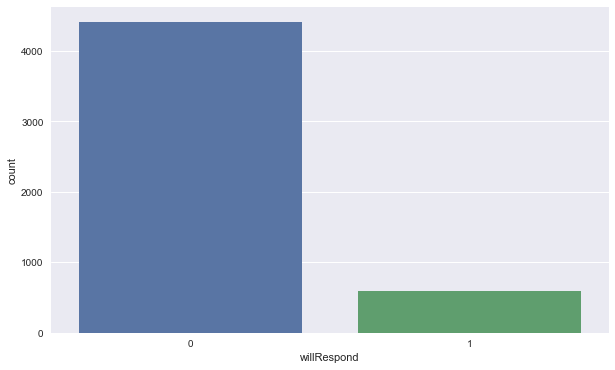

In [45]:
# Fist make sure it is binary
sns.countplot(x="willRespond", data=bank_dummy)
plt.show()

In [46]:
bank_dummy.isnull().sum()

willRespond    0
age            0
consconf       0
marital_0      0
marital_1      0
marital_2      0
marital_3      0
intercept      0
dtype: int64

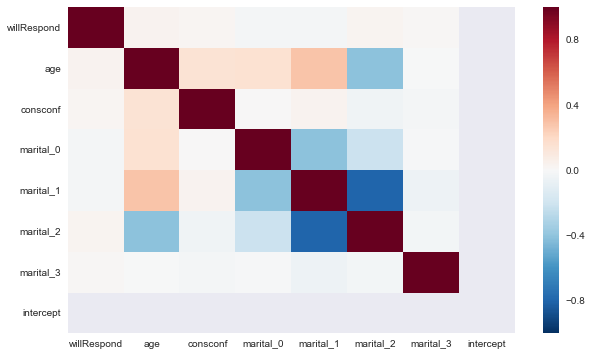

In [47]:
# Checking for independence between features
# the independent variables should be independent from each other
sns.heatmap(bank_dummy.corr())
plt.show()

In [48]:
# make sure every row
bank_dummy.apply(lambda x: len(x.unique()))

willRespond     2
age            68
consconf       26
marital_0       2
marital_1       2
marital_2       2
marital_3       2
intercept       1
dtype: int64

In [ ]:
# for hire, I think it is no violated

In [24]:
# if we tried the linear to look it
from statsmodels.formula.api import ols
bank_dummy.rename(columns={'cons.conf.idx':'consconf'},inplace=True)
Respond_marital_model = ols("willRespond ~ age + consconf + marital_0 + marital_1 + marital_2 -1", data=bank_dummy).fit()
Respond_marital_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            willRespond   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 18 Oct 2017   Prob (F-statistic):          3.39e-137
Time:                        18:01:25   Log-Likelihood:                -1433.4
No. Observations:                5000   AIC:                             2877.
Df Residuals:                    4995   BIC:                             2909.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0018      0.000      3.819      0.000       0.001       0.003
consconf       0.0005      0.001      0.572      0.567      -0.001       0.002
marital_0      0.0401      0.047      0.859      0.390      -0.051       0.131
marital_1      0.0580      0.044      1.315      0.188      -0.028       0.144
marital_2      0.0929      0.043      2.171      0.030       0.009       0.177
==============================================================================
Omnibus:                     2188.836   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7266.899
Skew:                           2.352   Prob(JB):                         0.00
Kurtosis:                       6.571   Cond. No.                         949.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

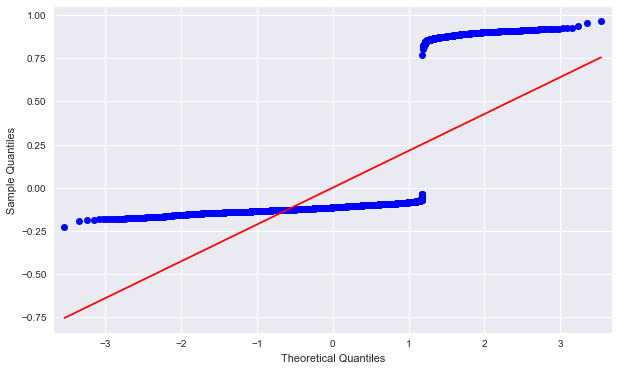

In [25]:
## Q-Q plot for normality

fig1=sm.qqplot(Respond_marital_model.resid, line='r')
plt.show()

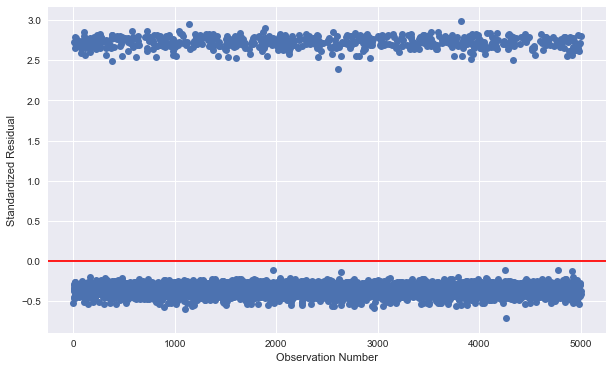

In [26]:
# simple plot of residuals
stdres=pd.DataFrame(Respond_marital_model.resid_pearson)
fig2 = plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')
print (fig2)

Figure(720x432)


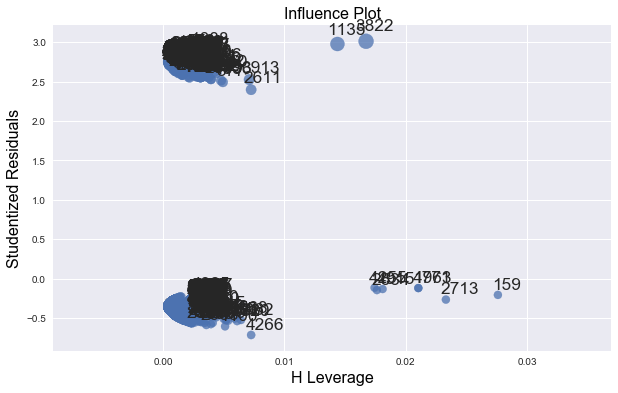

In [27]:
# leverage plot
fig5=sm.graphics.influence_plot(Respond_marital_model, size=15)
print(fig5)

In [28]:
# yes, part of data out to main place

In [29]:
#partB - 3
#Cross-validate the model. How well did it do?

In [30]:
X = bank_dummy[['age', 'consconf', 'marital_0', 'marital_1', 'marital_2', 'intercept']] 
y = bank_dummy[['willRespond']]
from sklearn.cross_validation import train_test_split  #这里是引用了交叉验证  
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
X_train.shape, y_train.shape

((3750, 6), (3750, 1))

In [32]:
X_test.shape, y_test.shape

((1250, 6), (1250, 1))

In [33]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print (confusion_matrix)

[[1101    0]
 [ 149    0]]


In [ ]:
# it means we have 1101 correct and 149 wrong

In [35]:
classifier.score(X_test,y_test)

0.88080000000000003

In [36]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [37]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94      1101
          1       0.00      0.00      0.00       149

avg / total       0.78      0.88      0.82      1250



In [ ]:
# for here, try to look the rmse situation

In [38]:
model = LinearRegression()  
results=model.fit(X_train, y_train)

In [39]:
# Create linear regression object
linreg2 = LinearRegression()

# Train the model using the training sets
linreg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# Compute RMSE on all data
y_pred = linreg2.predict(X_train)
rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred))
rmse

0.32197877724539459

In [41]:
y_m=np.mean(y_train)
y_m

willRespond    0.117867
dtype: float64

In [42]:
rmse/y_m

willRespond    2.73172
dtype: float64

In [43]:
model = sm.OLS(y_train, X_train)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            willRespond   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.194
Date:                Wed, 18 Oct 2017   Prob (F-statistic):             0.0522
Time:                        18:01:36   Log-Likelihood:                -1071.3
No. Observations:                3750   AIC:                             2155.
Df Residuals:                    3744   BIC:                             2192.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0017      0.001      3.040      0.002       0.001       0.003
consconf       0.0007      0.001      0.641      0.521      -0.002       0.003
marital_0     -0.0418      0.123     -0.340      0.734      -0.283       0.199
marital_1     -0.0326      0.122     -0.267      0.789      -0.272       0.207
marital_2     -0.0105      0.122     -0.086      0.932      -0.250       0.229
intercept      0.1062      0.135      0.786      0.432      -0.159       0.371
==============================================================================
Omnibus:                     1653.657   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5515.291
Skew:                           2.361   Prob(JB):                         0.00
Kurtosis:                       6.605   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
#AIC and BIC is lower than before